In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

vsync on, rects not in corner

In [2]:
PATH = "../data/vsync_off/221123_measurements_no_vsync"

In [3]:
files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]
files

['Java2D_default_False_bitblt_c722f456-6fdf-495a-baeb-4069fecfa2db.csv',
 'Java2D_default_False_getdbits_c380935b-58ac-4f0f-9def-4b897d22c008.csv',
 'Java2D_default_False_getpixel_8fa50564-a26b-42d2-bf50-cc09ab125223.csv',
 'Java2D_default_False_windup_python_f7d2123e-90ca-44b3-90d9-b05d93964824.csv',
 'Java2D_default_True_bitblt_2032538f-24c7-4d7c-823d-bff40f7a4acd.csv',
 'Java2D_default_True_getdbits_f86766e7-9338-4b33-a4b6-01f9e9f3e99e.csv',
 'Java2D_default_True_getpixel_8d102e0c-fd9c-4b23-9d95-c66f8993488a.csv',
 'Java2D_default_True_windup_python_81512a35-bdef-4236-9db9-c514b6f1076f.csv',
 'Java2D_rects_False_bitblt_81950ffd-89e3-49f8-8e8d-ab2e7955e6a6.csv',
 'Java2D_rects_False_getdbits_2cfe5682-56d6-45fd-b727-99b526638891.csv',
 'Java2D_rects_False_getpixel_501bfd0f-f098-4994-a259-17ef4b92f36f.csv',
 'Java2D_rects_False_windup_python_7a7f2cf9-9dea-4592-a7c6-1b129cf46774.csv',
 'Java2D_rects_True_bitblt_b5a9ad77-162e-490f-b456-e7edfd3ff1a1.csv',
 'Java2D_rects_True_getdbits_5606

In [4]:
dataframes = []
for file in files:
    dataframes.append(pd.read_csv(f"{PATH}/{file}"))
data_raw = pd.concat(dataframes)

In [5]:
# clean because windup not working with opengl based
# df.loc[~((df['col1'] == 'A') & (df['col2'] > 6))] 
data_clean = data_raw.loc[~((data_raw['program'] == 'windup_python') & (data_raw['framework'].str.contains('GL')))]

In [6]:
data = data_clean

## End-to-end latencies with and without running framework tester
### Complexity: Default

Almost the same -> no additional latency with framework tester

C:\Users\tina\AppData\Local\Temp\ipykernel_25752\4173412873.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running', dodge=True, color='black')


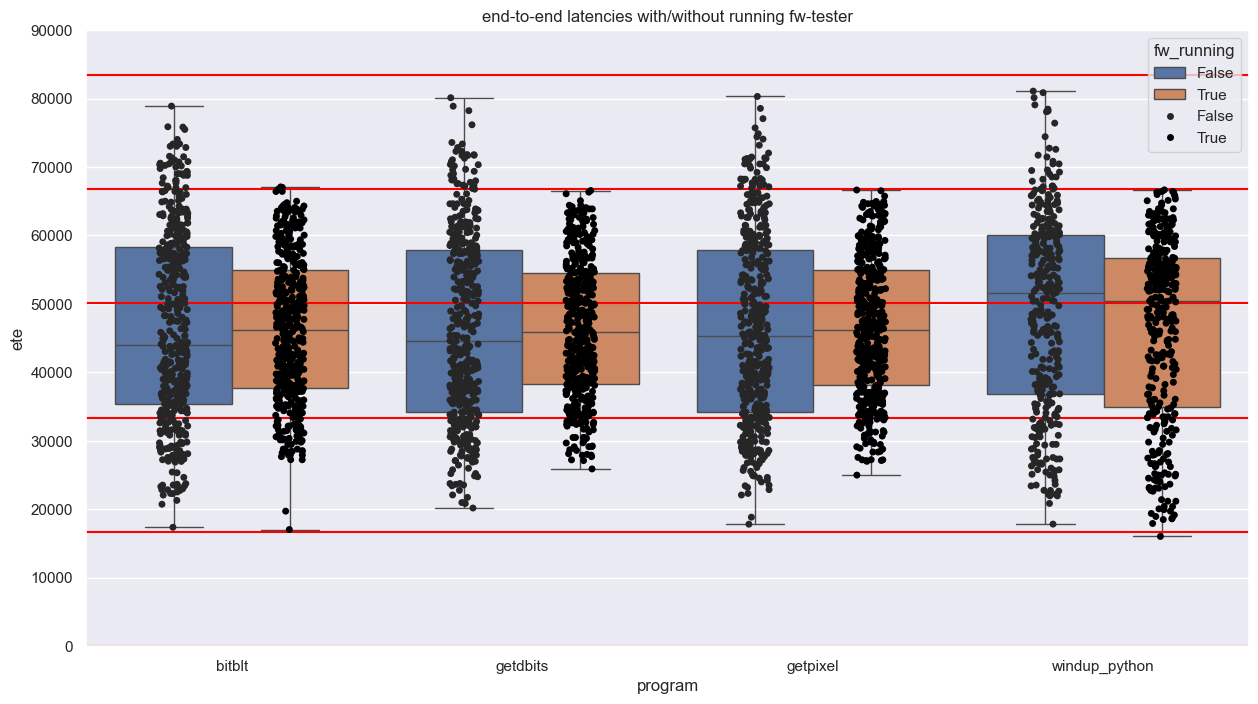

In [7]:
sns.set(rc={'figure.figsize':(15, 8)})
sns.boxplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running').set_title('end-to-end latencies with/without running fw-tester')
sns.stripplot(data=data[data['complexity'] == 'default'], x='program', y='ete', hue='fw_running', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(0, 90000)
for i in range(0, 20):
    plt.axhline(i*16.7*1000, color='red')

### Complexity: Rects

Also, no additional latency (even faster with running framework tester)

C:\Users\tina\AppData\Local\Temp\ipykernel_25752\3384622468.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running', dodge=True, color='black')


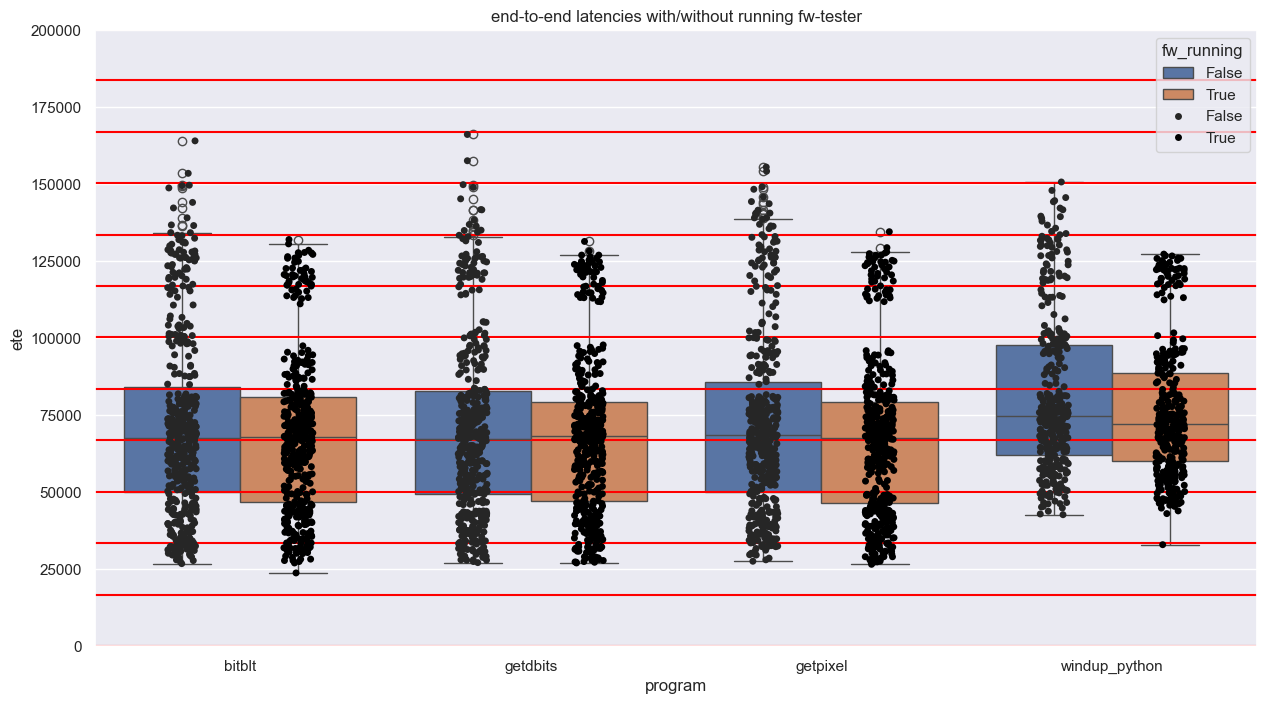

In [8]:
sns.boxplot(data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running').set_title('end-to-end latencies with/without running fw-tester')
sns.stripplot(data=data[data['complexity'] == 'rects'], x='program', y='ete', hue='fw_running', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(0, 200000)
for i in range(0, 20):
    plt.axhline(i*16.7*1000, color='red')

## Framework latency by framework
### Complexity: Default

no results for pyqt5 and wxpython because of border

C:\Users\tina\AppData\Local\Temp\ipykernel_25752\1753498729.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[((data['complexity'] == 'default') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True, color='black')


(-1000.0, 25000.0)

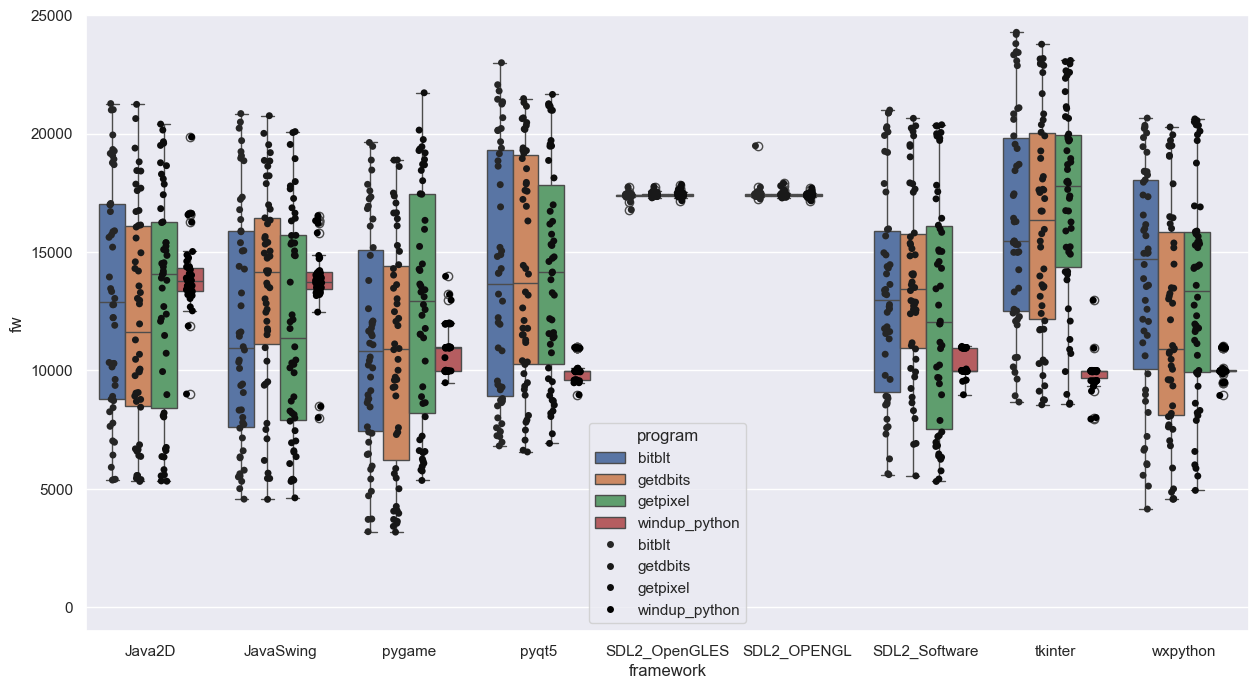

In [9]:
sns.boxplot(data=data[((data['complexity'] == 'default') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[((data['complexity'] == 'default') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(-1000, 25000)

### Complexity: Rects

C:\Users\tina\AppData\Local\Temp\ipykernel_25752\84911319.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[((data['complexity'] == 'rects') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True, color='black')


(-1000.0, 100000.0)

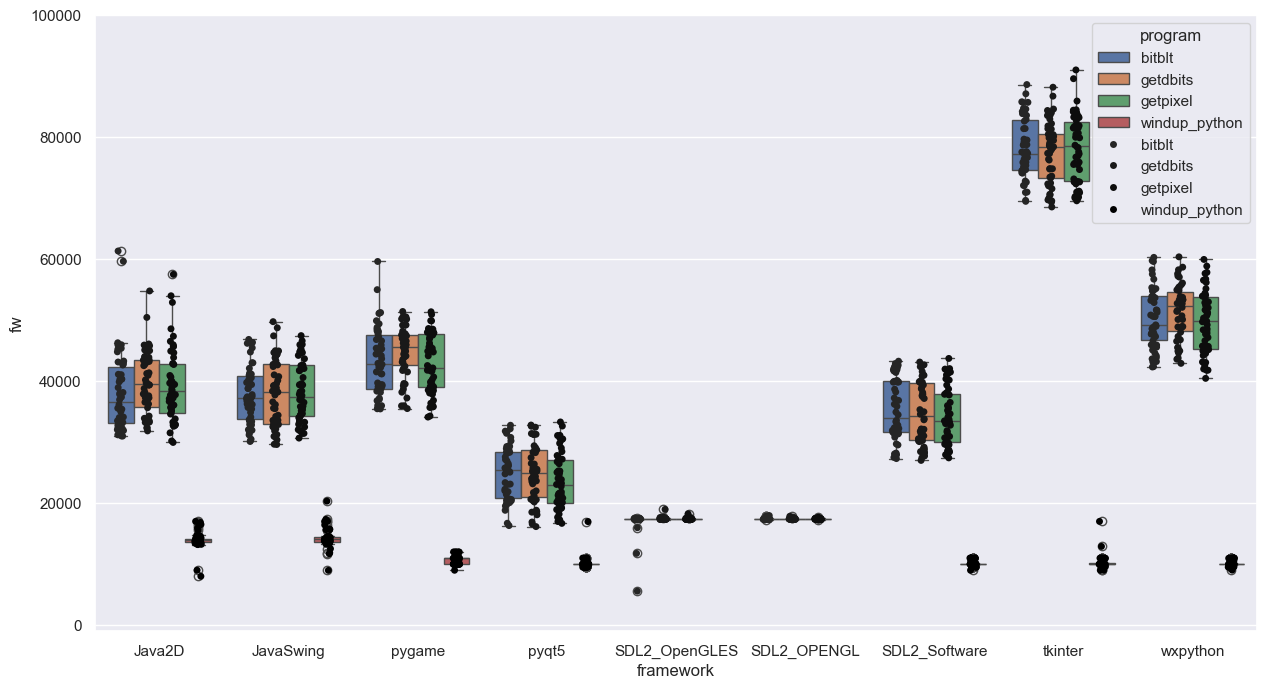

In [10]:
sns.boxplot(data=data[((data['complexity'] == 'rects') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[((data['complexity'] == 'rects') & (data['fw_running'] == True))], x='framework', y='fw', hue='program', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(-1000, 100000)

### Framework latency by complexity

C:\Users\tina\AppData\Local\Temp\ipykernel_25752\3399512195.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['fw_running'] == True], x='complexity', y='fw', hue='program_fwrunning', dodge=True, color='black')


(-5000.0, 150000.0)

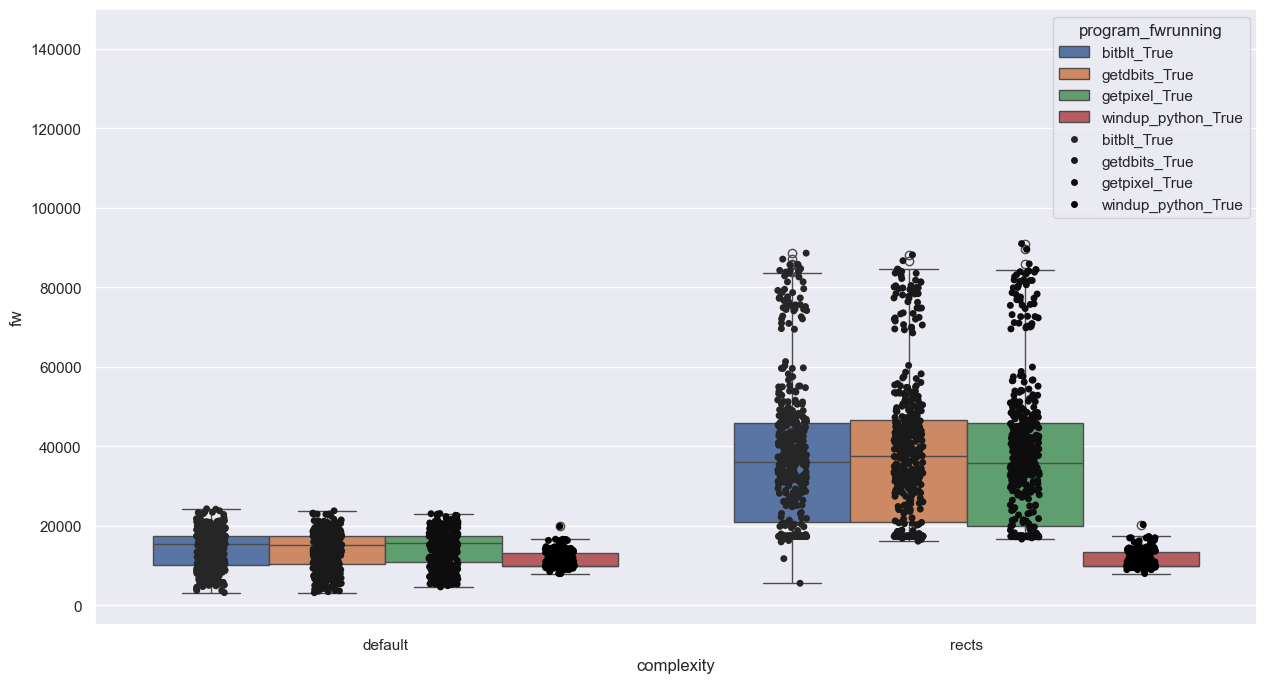

In [11]:
sns.boxplot(data=data[data['fw_running'] == True], x='complexity', y='fw', hue='program_fwrunning', dodge=True).set_title('')
sns.stripplot(data=data[data['fw_running'] == True], x='complexity', y='fw', hue='program_fwrunning', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(-5000, 150000)

### Framework latency by framework

C:\Users\tina\AppData\Local\Temp\ipykernel_25752\3932135016.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#000000'` for the same effect.

  sns.stripplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='framework_complexity', dodge=True, color=(0,0,0))


(-5000.0, 150000.0)

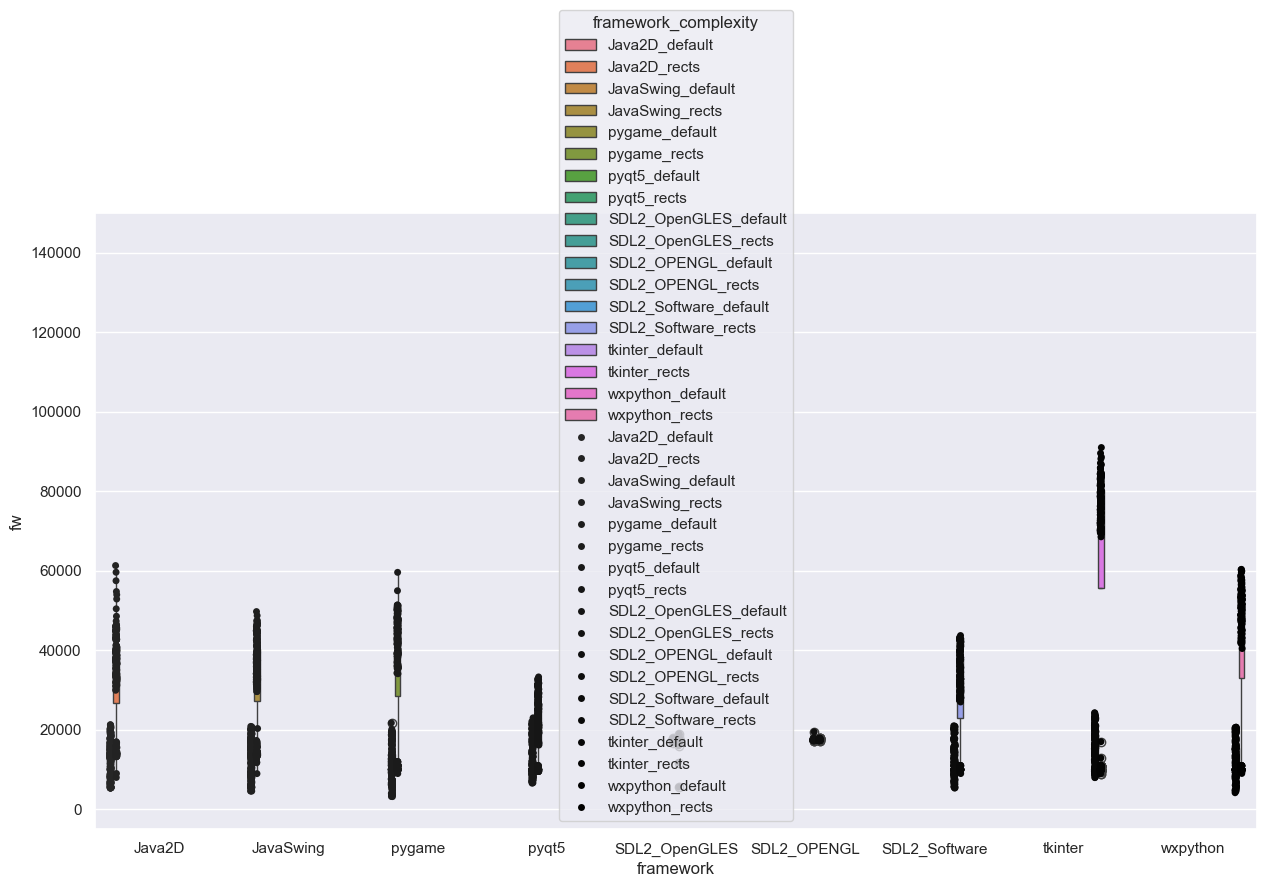

In [12]:
sns.boxplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='framework_complexity', dodge=True).set_title('')
sns.stripplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='framework_complexity', dodge=True, color=(0,0,0))
ax = plt.gca()
ax.set_ylim(-5000, 150000)

C:\Users\tina\AppData\Local\Temp\ipykernel_25752\594577958.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='program', dodge=True, color='black')


(-5000.0, 150000.0)

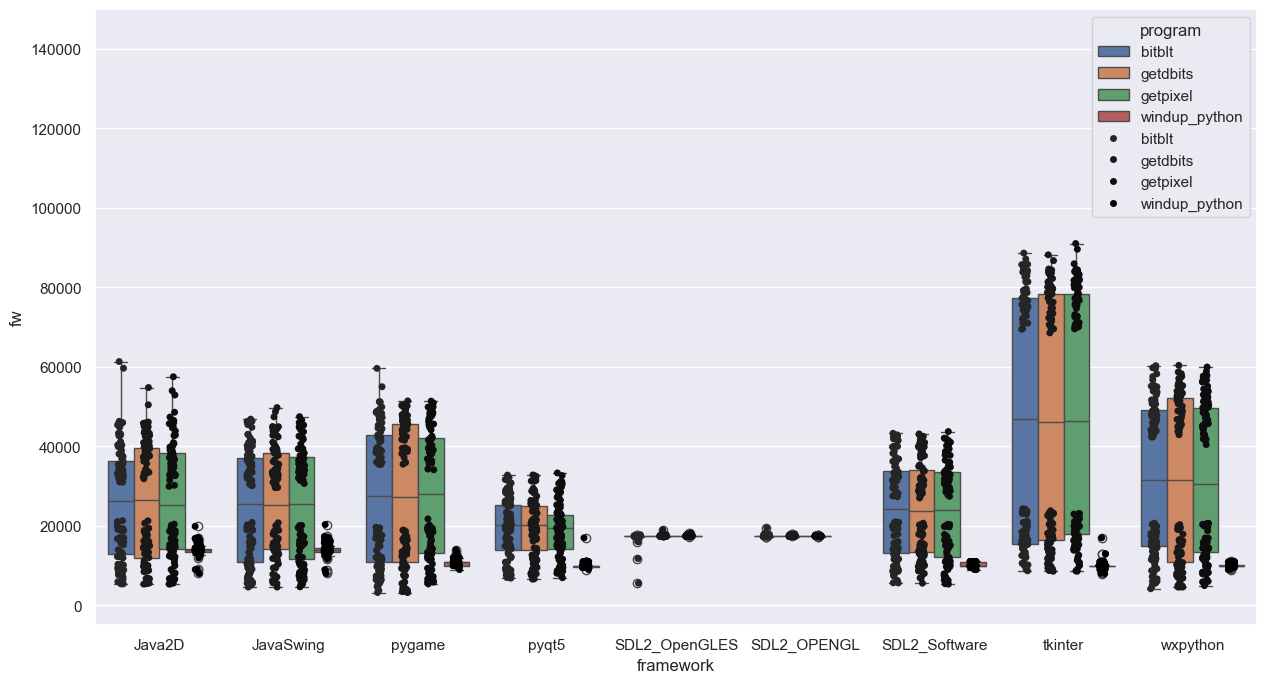

In [13]:
sns.boxplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[data['fw_running'] == True], x='framework', y='fw', hue='program', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(-5000, 150000)

## Difference (ete and fw) by program
### Complexity: Rects

C:\Users\tina\AppData\Local\Temp\ipykernel_25752\3421617578.py:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'rects'))], x='framework', y='diff', hue='program', dodge=True, color='black')


(-80000.0, 100000.0)

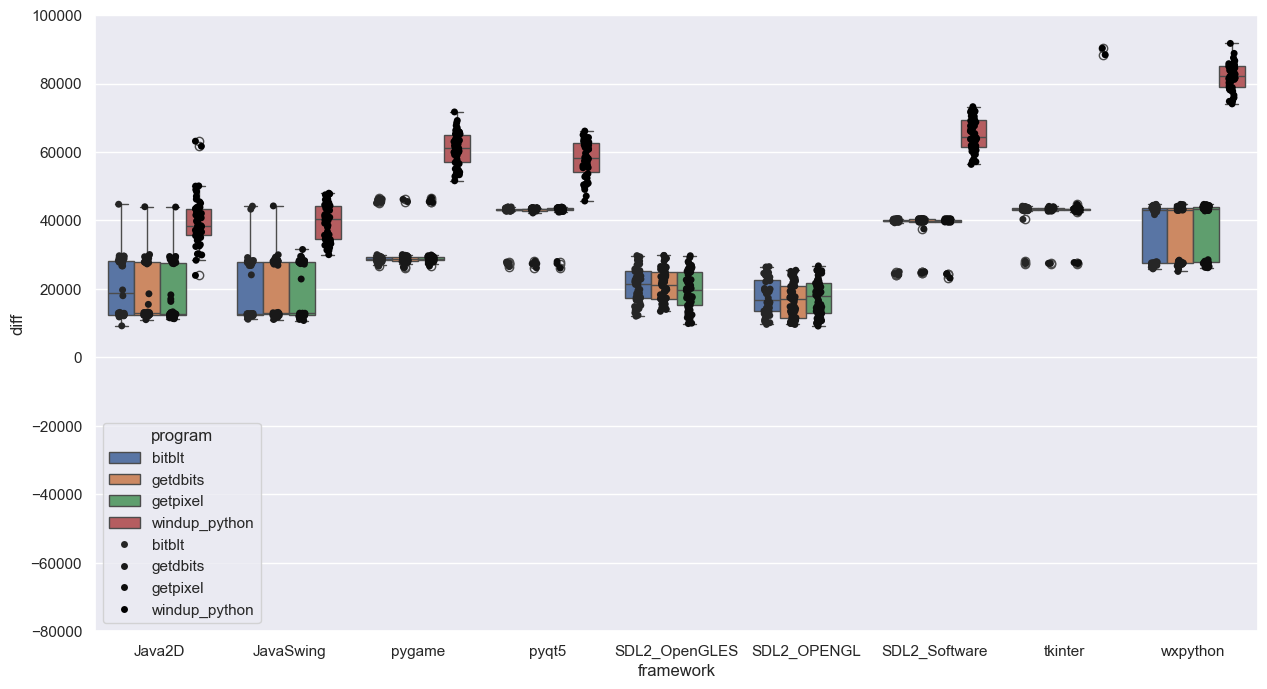

In [14]:
sns.boxplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'rects'))], x='framework', y='diff', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'rects'))], x='framework', y='diff', hue='program', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(-80000, 100000)

### Complexity: Default

C:\Users\tina\AppData\Local\Temp\ipykernel_25752\605666535.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'default'))], x='framework', y='diff', hue='program', dodge=True, color='black')


(-80000.0, 80000.0)

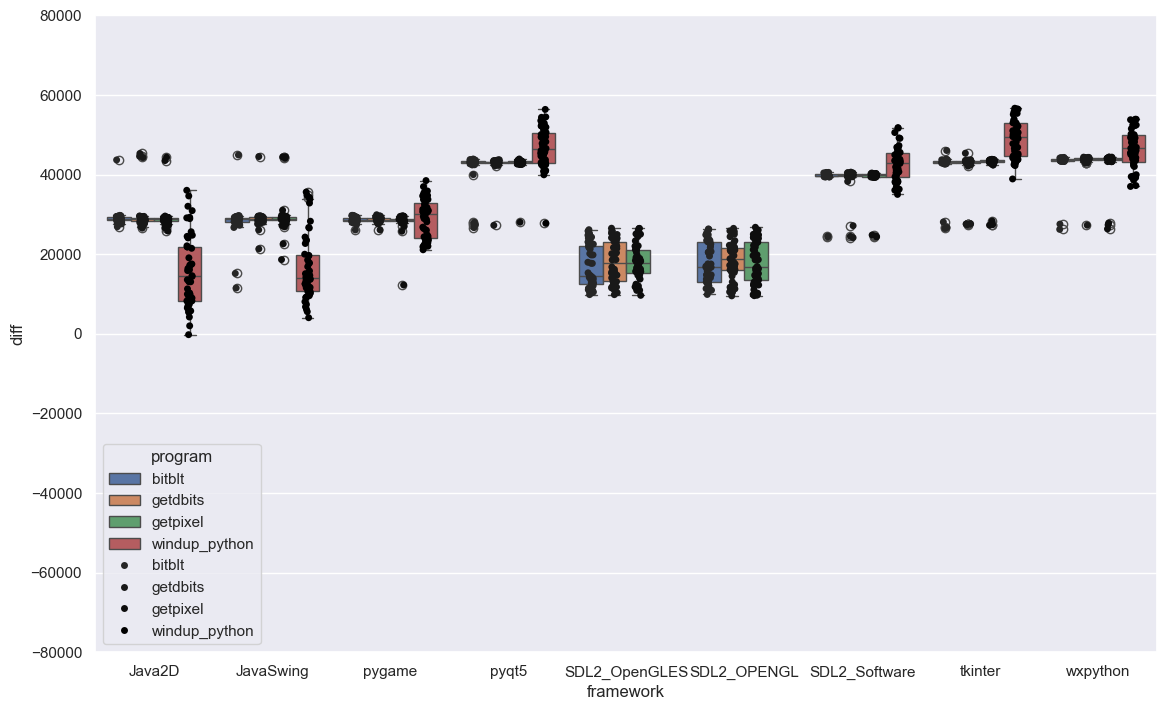

In [15]:
sns.set(rc={'figure.figsize':(13.7,8.27)})
sns.boxplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'default'))], x='framework', y='diff', hue='program', dodge=True).set_title('')
sns.stripplot(data=data[((data['fw_running'] == True) & (data['complexity'] == 'default'))], x='framework', y='diff', hue='program', dodge=True, color='black')
ax = plt.gca()
ax.set_ylim(-80000, 80000)

(-80000.0, 80000.0)

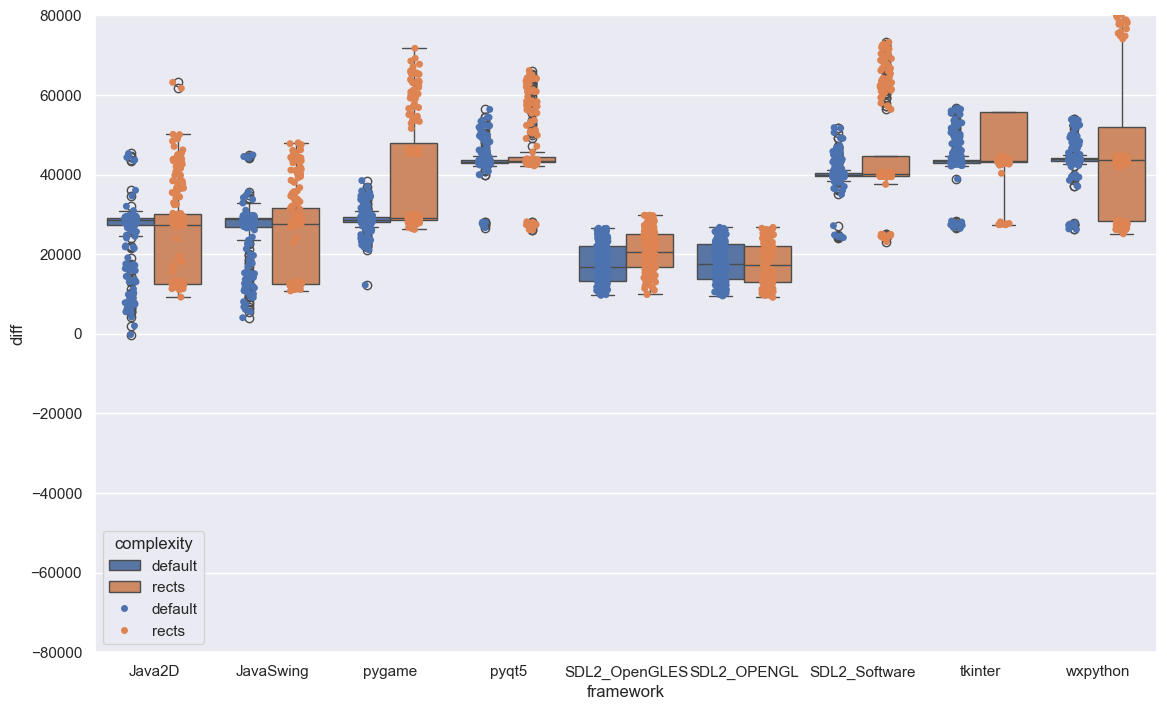

In [16]:
sns.boxplot(data=data[(data['fw_running'] == True)], x='framework', y='diff', hue='complexity', dodge=True).set_title('')
sns.stripplot(data=data[(data['fw_running'] == True)], x='framework', y='diff', hue='complexity', dodge=True)
ax = plt.gca()
ax.set_ylim(-80000, 80000)